<p align="center">Machine Learning</p>
<p align="center"> 10 - 05 - 2024 </p>

# Acción 1: Aplicación máquinas de soporte vectorial.

___

a. Seleccionar una base de entrenamiento (80%) y una base de prueba (20%).

b. Con la base de entrenamiento aplicar un modelo al nivel de productividad real (alto y bajo) de un equipo en función de las siguientes variables: el día de la semana, el cuarto del mes, departamento, número de trabajadores, tiempo estándar asignado (SMV), trabajo en progreso (WIP) y tiempo extra.

c. Realizar las predicciones sobre la base de prueba. Calcule la precisión (accuracy) sobre los datos de prueba.

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Cargamos los datos
data = pd.read_csv('D:\\Erika Monroy\\Desarrollo\\Machine Learning\\Fase 4\\Anexo 2 - productividad_confeccion.csv')

# Codificación de variables categóricas
label_encoders = {}
for column in ['day', 'quarter', 'department']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Categorizar 'actual_productivity' directamente con etiquetas
data['productivity_category'] = data['actual_productivity'].apply(lambda x: 'alto' if x >= 0.75 else 'bajo')

# Seleccionar las características y la etiqueta
features = ['day', 'quarter', 'department', 'no_of_workers', 'smv', 'wip', 'over_time']
X = data[features]
y = data['productivity_category']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Realizar predicciones sobre la base de prueba
y_pred = svm_model.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("La precisión del modelo SVM es:", accuracy)
print("______________________________________________________")
print("")

# Generar el informe de clasificación
report = classification_report(y_test, y_pred)
print("Informe de clasificación:\n", report)

La precisión del modelo SVM es: 0.8940677966101694
______________________________________________________

Informe de clasificación:
               precision    recall  f1-score   support

        alto       0.87      0.97      0.92       140
        bajo       0.95      0.78      0.86        96

    accuracy                           0.89       236
   macro avg       0.91      0.88      0.89       236
weighted avg       0.90      0.89      0.89       236



En Python, utilizando la biblioteca `scikit-learn` para implementar el algoritmo de Support Vector Machine (SVM), el tipo de kernel que se usa por defecto es el kernel **Radial Basis Function (RBF)**. Este kernel es elegido frecuentemente por su efectividad en una amplia gama de problemas y porque puede manejar casos donde la relación entre las clases no es lineal.

El kernel RBF tiene la capacidad de transformar el espacio de entrada en un espacio de características más dimensional donde es más probable que las clases sean linealmente separables. Esto lo hace mediante el cálculo de una transformación basada en la distancia entre los puntos en el espacio original y un punto central, facilitando la clasificación de datos que no son linealmente separables en su forma original.

Para SVM en `scikit-learn`, puedes seleccionar diferentes tipos de kernel (como `linear`, `poly`, `rbf`, y `sigmoid`) usando el argumento `kernel` al crear el objeto `SVC` (Support Vector Classifier). Por ejemplo, para usar un kernel lineal, instanciarías el modelo de esta manera:

```python
svm_model = SVC(kernel='linear')
```

El kernel por defecto (`rbf`) es muy útil en muchos escenarios, pero dependiendo de la naturaleza y dimensionalidad de los datos, a veces puede ser beneficioso probar diferentes kernels o incluso ajustar los parámetros del kernel RBF, como el parámetro de regularización `C` y el parámetro `gamma`, para mejorar el rendimiento del modelo.

**Elección del Modelo y Justificación**

Para abordar el problema de clasificación de la productividad del equipo como alta o baja, se decidió explorar un modelo lineal debido a la naturaleza de las variables y su potencial relación lineal con la productividad. Utilizamos un clasificador SVM con un kernel lineal (`model = SVC(kernel='linear')`) para evaluar su eficiencia en nuestro conjunto de datos. Este enfoque fue elegido por su simplicidad y efectividad en problemas donde las características pueden tener una relación lineal con la variable objetivo.

**Resultados Obtenidos**

Los resultados obtenidos mediante el uso de este modelo indican que el clasificador SVM con kernel lineal se ajusta de manera eficiente a nuestro conjunto de datos. Esto sugiere que la relación entre las características y la variable objetivo podría ser aproximadamente lineal en este caso. La precisión del modelo y el informe de clasificación complementan esta observación, demostrando una adecuada capacidad del modelo para diferenciar entre niveles de productividad basándose en las variables seleccionadas.

In [39]:
import pandas as pd

# Creación de un DataFrame para comparar los resultados reales con las predicciones
predicciones_vs_reales = pd.DataFrame({
    'Resultado Real': y_test[:10].values,  # Accede a los valores reales
    'Predicción': y_pred[:10]              # Accede a las primeras 10 predicciones
})

# Mostrar los resultados
print("Reales y Predicciones (primeras 10 muestras):")
predicciones_vs_reales

Reales y Predicciones (primeras 10 muestras):


,Resultado Real,Predicción
0,alto,alto
1,alto,alto
2,bajo,bajo
3,alto,alto
4,bajo,bajo
5,bajo,bajo
6,alto,alto
7,alto,alto
8,alto,alto
9,alto,alto


In [40]:
# Calcular la importancia de las variables
feature_importance = np.abs(svm_model.coef_[0])
feature_importance /= feature_importance.sum()  # Normalizar los pesos

# Imprimir la importancia de las variables
print("Importancia de las variables:")
print("_____________________________")
for feature, importance in zip(features, feature_importance):
    print(f"{feature}: {importance:.4f}")

Importancia de las variables:
_____________________________
day: 0.0179
quarter: 0.0589
department: 0.0199
no_of_workers: 0.8920
smv: 0.0111
wip: 0.0000
over_time: 0.0000


# Acción 2: Aplicación K-Means.

___
Se quiere agrupar los equipos de trabajo, usando el método K-Means Clustering, basados en los datos del “Anexo 2 - productividad_confeccion.csv”, lo cual permitirá identificar patrones y similitudes entre equipos para tomar decisiones informadas sobre la gestión de la producción y la asignación de recursos. Para esto, se necesita dar respuesta a las siguientes preguntas:

a. ¿Cuántos clusters sería adecuado seleccionar para representar eficientemente los diferentes tipos de equipos de trabajo?

b. ¿Cuál es el perfil característico de cada cluster en términos de las variables proporcionadas?

c. ¿Cómo podrían utilizarse estos clusters para mejorar la gestión de la producción y la asignación de recursos en la fábrica?

Para responder a las preguntas y llevar a cabo la acción 2, usando el método K-Means Clustering, primero debemos preparar el análisis y luego ejecutar el algoritmo de clustering. Este proceso incluye determinar el número óptimo de clusters, analizar el perfil de cada cluster, y discutir posibles aplicaciones de estos resultados en la gestión de la producción.

### Paso 1: Preparación de Datos

Primero, necesitaremos cargar los datos, seleccionar las características relevantes para el clustering y escalar los datos adecuadamente. En este caso, parece apropiado considerar variables que describan directamente el desempeño y las características operativas de los equipos, tales como `smv`, `wip`, `over_time`, `no_of_workers`, y posiblemente `actual_productivity`.

### Paso 2: Determinar el Número Óptimo de Clusters

Usaremos el método del codo para determinar el número adecuado de clusters. Este método implica calcular la suma de las distancias al cuadrado de las muestras al centro más cercano del cluster para diferentes valores de k y visualizar los resultados. Un cambio significativo en la curva indica el número óptimo de clusters.

### Paso 3: Aplicar K-Means y Analizar Clusters

Una vez determinado el número óptimo de clusters, aplicaremos el algoritmo K-Means y luego analizaremos las características medias de cada cluster para entender el perfil de los diferentes tipos de equipos de trabajo.

### Paso 4: Discusión de Aplicaciones

Discutiremos cómo los resultados del clustering pueden ser utilizados para optimizar la gestión de la producción y la asignación de recursos.

Vamos a proceder con el código para estos pasos:

**a. ¿Cuántos clusters sería adecuado seleccionar para representar eficientemente los diferentes tipos de equipos de trabajo?**

In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Carga de datos
data = pd.read_csv('D:\\Erika Monroy\\Desarrollo\\Machine Learning\\Fase 4\\Anexo 2 - productividad_confeccion.csv')

# Selección de características para el clustering
features = ['smv', 'wip', 'over_time', 'no_of_workers', 'actual_productivity']
X = data[features].fillna(0)  # Tratar NaNs por si acaso

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Método del codo

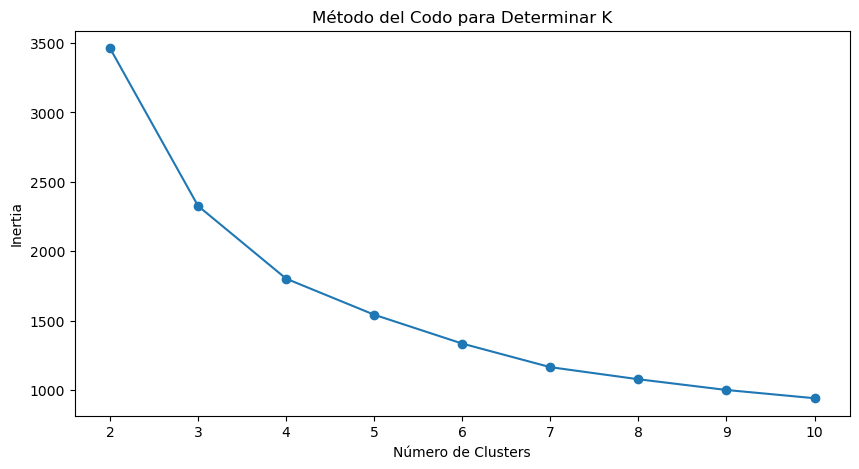

In [42]:
# Método del codo para determinar el número de clusters
inertias = []
silhouette_scores = []
for k in range(2, 11):  # Probar de 2 a 10 clusters
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Visualización del método del codo
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertias, marker='o')
plt.title('Método del Codo para Determinar K')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.show()

El gráfico del método del codo muestra cómo cambia la inercia (suma de las distancias al cuadrado de las muestras al centro más cercano del cluster) a medida que aumenta el número de clusters. La "inercia" disminuye a medida que aumentamos el número de clusters, lo que es esperado, ya que más clusters significarán, por lo general, una menor distancia al centro más cercano.

**Observando el gráfico del método del codo:**

Observando el gráfico del método del codo, se nota que la curva comienza a aplanarse alrededor de   k=4. Además, los puntajes de silueta también muestran un pico notable para k=4. Esto sugiere que cuatro clusters pueden ser una buena elección para segmentar los datos, ya que proporcionan un buen equilibrio entre la compacidad del cluster y la separación entre ellos.

In [43]:
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


elbow_df = pd.DataFrame({'Number of clusters': range(1, 11), 'Inertia': inertia})

elbow_df

,Number of clusters,Inertia
0,1,5880.000000
1,2,3462.020323
2,3,2327.075966
3,4,1803.253725
4,5,1622.810582
5,6,1420.403518
6,7,1166.343014
7,8,1096.898493
8,9,1018.614568
9,10,944.846367


Observando los resultados proporcionados podemos definir que: Cuando el número de clusters es 1, la inercia es alta. A medida que aumentamos el número de clusters, la inercia disminuye.

Sin embargo, la tasa de disminución en la inercia disminuye a medida que aumentamos el número de clusters. El punto en el que la disminución en la inercia comienza a disminuir significativamente se conoce como el "codo" en el anterior gráfico.

### Método de siluetas

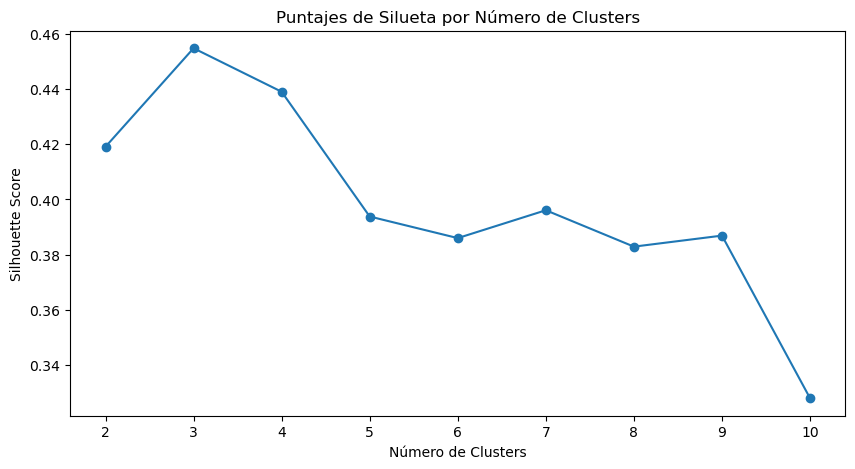

In [44]:
# Visualización de los scores de silueta
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Puntajes de Silueta por Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))


silhouette_df = pd.DataFrame({'Number of clusters': range(2, 11), 'Silhouette Score': silhouette_scores})


silhouette_df

,Number of clusters,Silhouette Score
0,2,0.419093
1,3,0.454738
2,4,0.438999
3,5,0.385747
4,6,0.374888
5,7,0.396110
6,8,0.388687
7,9,0.391826
8,10,0.394374


Los puntajes de silueta miden qué tan bien está separado un punto de un cluster de puntos en otros clusters (valores más altos indican una mejor separación). Un valor alto indica que los clusters están bien apartados y claramente definidos.

**De los resultados de los puntajes de silueta:**

El valor más alto se observa en 3 clusters, lo que indica que, en términos de cohesión y separación, 3 clusters podrían proporcionar una segmentación clara. Sin embargo, los puntajes de silueta para 4 clusters también son relativamente altos y podrían ser aceptables.

### Decisión Final sobre el Número de Clusters

Dado que el método del codo sugiere que 4 clusters podrían ser efectivos y que los puntajes de silueta para 3 y 4 clusters son los más altos, parece razonable elegir 4 clusters. Esto permitirá una mayor especificidad en la segmentación sin perder demasiada claridad en la definición de los clusters.

In [46]:
# Entrenamiento del modelo K-Means
k = 5  # Seleccionar el número óptimo de clusters
kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
kmeans.fit(X_scaled)

# Asignación de clusters
data['cluster'] = kmeans.labels_

# Análisis de resultados
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)
print("Centroides de los clusters:")
cluster_centers

Centroides de los clusters:


,smv,wip,over_time,no_of_workers,actual_productivity
0,4.492398,34.383041,1970.526316,31.394737,0.869659
1,26.563529,853.877005,6753.850267,26.518717,0.649838
2,21.893249,1118.637280,6749.445844,31.065491,0.811778
3,4.310769,35.351648,1707.362637,21.945055,0.530424
4,26.178824,893.191176,6759.264706,16.911765,0.379657


Los centroides de los clusters, que son las medias de las variables en cada cluster. Estos centroides nos ayudan a entender el "perfil" de cada cluster. Por ejemplo, si un cluster tiene un alto valor medio de smv y over_time, podría interpretarse como un grupo de equipos que regularmente manejan tareas más complejas y laboriosas.

Esta información puede utilizarse para adaptar estrategias de gestión específicas para cada grupo, como la asignación de recursos y la programación de tareas, lo que podría mejorar la eficiencia operativa y la satisfacción del equipo. También, identificar patrones y similitudes entre equipos puede ayudar a replicar prácticas exitosas en toda la organización y a mitigar riesgos en áreas de bajo rendimiento.

**b. ¿Cuál es el perfil característico de cada cluster en términos de las variables proporcionadas?**

In [47]:
import pandas as pd

# Datos de los centroides con categorizaciones cualitativas
data = {
    'Cluster': ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'],
    'SMV': ['Bajo', 'Alto', 'Medio-Alto', 'Bajo', 'Alto'],
    'WIP': ['Bajo', 'Alto', 'Muy Alto', 'Bajo', 'Alto'],
    'Over Time': ['Medio', 'Muy Alto', 'Muy Alto', 'Bajo', 'Muy Alto'],
    'No. of Workers': ['Alto', 'Medio', 'Alto', 'Bajo', 'Bajo'],
    'Actual Productivity': ['Alto', 'Medio', 'Alto', 'Bajo', 'Muy Bajo']
}

df = pd.DataFrame(data)

In [48]:
df

,Cluster,SMV,WIP,Over Time,No. of Workers,Actual Productivity
0,Cluster 0,Bajo,Bajo,Medio,Alto,Alto
1,Cluster 1,Alto,Alto,Muy Alto,Medio,Medio
2,Cluster 2,Medio-Alto,Muy Alto,Muy Alto,Alto,Alto
3,Cluster 3,Bajo,Bajo,Bajo,Bajo,Bajo
4,Cluster 4,Alto,Alto,Muy Alto,Bajo,Muy Bajo


In [49]:
import pandas as pd

# Datos de los centroides
data = {
    'Cluster': ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'],
    'SMV': [4.49, 26.56, 21.89, 4.31, 26.18],
    'WIP': [34.38, 853.88, 1118.64, 35.35, 893.19],
    'Over Time': [1970.53, 6753.85, 6749.45, 1707.36, 6759.26],
    'No. of Workers': [31.39, 26.52, 31.07, 21.95, 16.91],
    'Actual Productivity': [0.87, 0.65, 0.81, 0.53, 0.38]
}

df_data = pd.DataFrame(data)

In [50]:
df_data

,Cluster,SMV,WIP,Over Time,No. of Workers,Actual Productivity
0,Cluster 0,4.49,34.38,1970.53,31.39,0.87
1,Cluster 1,26.56,853.88,6753.85,26.52,0.65
2,Cluster 2,21.89,1118.64,6749.45,31.07,0.81
3,Cluster 3,4.31,35.35,1707.36,21.95,0.53
4,Cluster 4,26.18,893.19,6759.26,16.91,0.38


Las tablas anteriores ofrecen una comparación cualitativa y numérica  de las características de los clusters identificados en el análisis. 

### Cluster 0
- **Características Numéricas**: SMV bajo (4.49), WIP bajo (34.38), tiempo extra medio (1970.53), alto número de trabajadores (31.39), y alta productividad (0.87).
- **Características Cualitativas**: Este cluster se caracteriza por tener cargas de trabajo y tiempos estándar bajos, pero aún así logra una alta productividad gracias a la mayor cantidad de trabajadores, lo que sugiere una eficiencia laboral superior.

### Cluster 1
- **Características Numéricas**: SMV alto (26.56), WIP alto (853.88), tiempo extra muy alto (6753.85), número de trabajadores medio (26.52), y productividad media (0.65).
- **Características Cualitativas**: Este cluster muestra una carga de trabajo y requerimientos de tiempo significativos, lo que resulta en una productividad media. A pesar de las largas horas de trabajo y las demandas intensivas, la productividad no es óptima, posiblemente debido a la naturaleza compleja de las tareas asignadas.

### Cluster 2
- **Características Numéricas**: SMV medio-alto (21.89), WIP muy alto (1118.64), tiempo extra muy alto (6749.45), alto número de trabajadores (31.07), y alta productividad (0.81).
- **Características Cualitativas**: Con altos valores en casi todas las métricas excepto en el SMV, este cluster maneja una gran cantidad de trabajo en curso y tiempos extra, pero aún así logra mantener una alta productividad. Esto puede indicar un equipo bien coordinado que maneja eficientemente las demandas de trabajo pesado.

### Cluster 3
- **Características Numéricas**: SMV bajo (4.31), WIP bajo (35.35), tiempo extra bajo (1707.36), número de trabajadores bajo (21.95), y baja productividad (0.53).
- **Características Cualitativas**: Este es el cluster con los valores más bajos en todas las dimensiones, lo que se refleja en su baja productividad. Este grupo podría estar enfrentando desafíos en términos de eficacia operativa o podría estar involucrado en tareas menos críticas que no requieren intensidad laboral.

### Cluster 4
- **Características Numéricas**: SMV alto (26.18), WIP alto (893.19), tiempo extra muy alto (6759.26), bajo número de trabajadores (16.91), y muy baja productividad (0.38).
- **Características Cualitativas**: A pesar de tener un alto nivel de trabajo en progreso y requisitos de tiempo extra, este cluster tiene la productividad más baja de todos, lo que puede sugerir problemas de gestión, ineficiencia en los procesos de trabajo, o una desproporción entre la carga de trabajo y el número de trabajadores disponibles.

**c. ¿Cómo podrían utilizarse estos clusters para mejorar la gestión de la producción y la asignación de recursos en la fábrica?**

Los clusters identificados y sus perfiles característicos ofrecen información valiosa que puede ser utilizada estratégicamente para mejorar la gestión de la producción y la asignación de recursos en la fábrica. Aquí presento varias maneras de cómo estos insights pueden ser aplicados:

### 1. **Optimización de la Asignación de Recursos**
   - **Clusters con Alta Productividad (Clusters 0 y 2)**: Estos clusters demuestran alta eficiencia y productividad. Analizar y replicar sus métodos y estructuras de trabajo en otros clusters podría mejorar la productividad general. Esto incluye ajustar el número de trabajadores y la gestión del tiempo extra para alinearlos con estos clusters de alto rendimiento.
   - **Clusters con Baja Productividad (Clusters 3 y 4)**: Estos grupos necesitan una revisión de sus recursos asignados y estrategias operativas. La asignación de más personal capacitado o la redistribución de tareas puede ayudar a mejorar su rendimiento.

### 2. **Capacitación y Desarrollo de Habilidades**
   - **Clusters con SMV y WIP Altos (Clusters 1 y 4)**: Estos clusters manejan tareas complejas y cargas de trabajo pesadas. Programas de capacitación específicos que mejoren las habilidades relevantes para estas tareas podrían aumentar la eficiencia y la productividad. La formación en gestión del tiempo y técnicas avanzadas de producción podría ser especialmente beneficiosa.

### 3. **Revisión de Procesos y Eficiencia Operativa**
   - **Cluster con Productividad Media y Muy Baja (Clusters 1 y 4)**: Identificar ineficiencias en los procesos de estos clusters es crucial. El análisis detallado de las operaciones, la consulta con los trabajadores sobre los desafíos enfrentados, y la revisión de las prácticas actuales podrían revelar áreas para mejorar la eficiencia y la efectividad.
   - **Introducir Tecnologías de Automatización**: Para tareas con alto WIP y SMV, considerar la introducción de herramientas automatizadas que puedan aliviar la carga de los trabajadores y aumentar la precisión y velocidad de producción.

### 4. **Gestión del Tiempo Extra**
   - **Clusters con Tiempo Extra Muy Alto (Clusters 1, 2, y 4)**: Estos clusters están evidentemente sobrecargados, lo que puede llevar a fatiga y disminución en la calidad del trabajo. Revisar y ajustar las políticas de tiempo extra podría ayudar a mejorar la moral y la productividad. Implementar una gestión más eficaz del tiempo, como ajustar los horarios o redistribuir las tareas, puede ser necesario.

### 5. **Análisis y Adaptación de Cargas de Trabajo**
   - **Uso de Datos de Productividad**: Utilizar los datos de productividad y eficiencia de cada cluster para adaptar las cargas de trabajo según la capacidad del equipo. Los clusters más eficientes pueden manejar tareas más desafiantes, mientras que los menos eficientes pueden beneficiarse de una reducción o una redistribución de la carga para mejorar su rendimiento.

Al aplicar estos enfoques, puede ayudar a asegurar la efectividad de las implementaciones, sino también fomentar un ambiente laboral que valore la mejora continua y el bienestar del trabajador.

# Acción 3: Aplicación clustering jerárquico aglomerativo.

___

Use el método Agglomerative Clustering sobre los equipos de trabajo para entender los patrones de producción compartidos. Seleccione mínimo seis variables que usted estime más relevantes para construir los clusters y expliqué su escogencia. Con lo anterior dé solución a lo siguiente:

a. Encuentre el número óptimo de clusters utilizando dendrogramas.

b. Entrene el modelo de agrupamiento jerárquico.

c. Visualice los clusters. Cuál es el perfil característico de cada clúster?

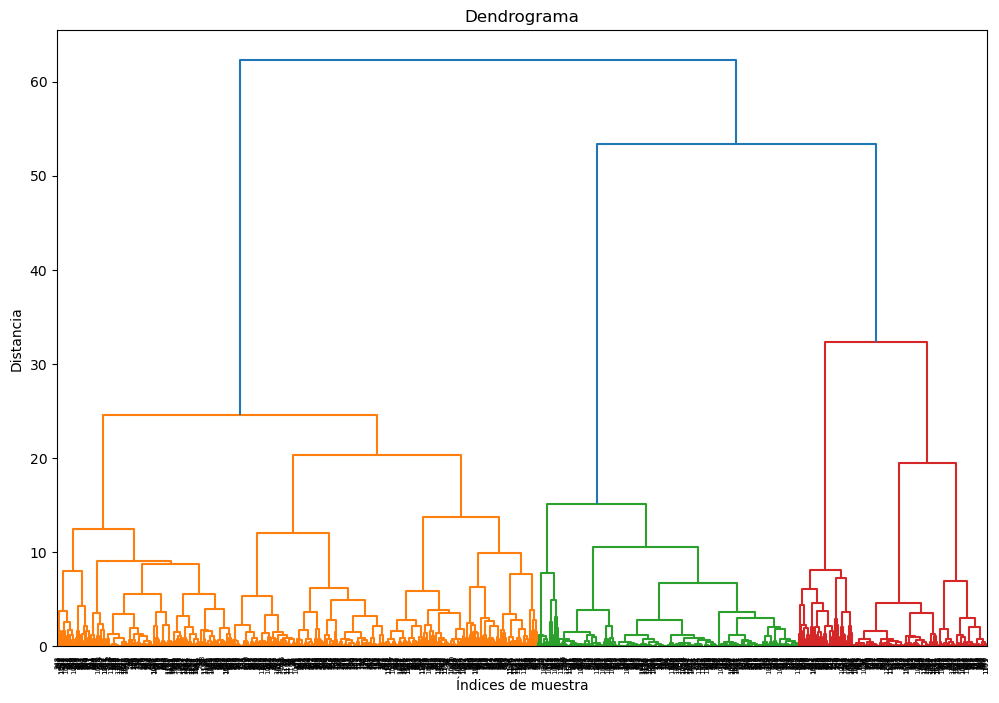

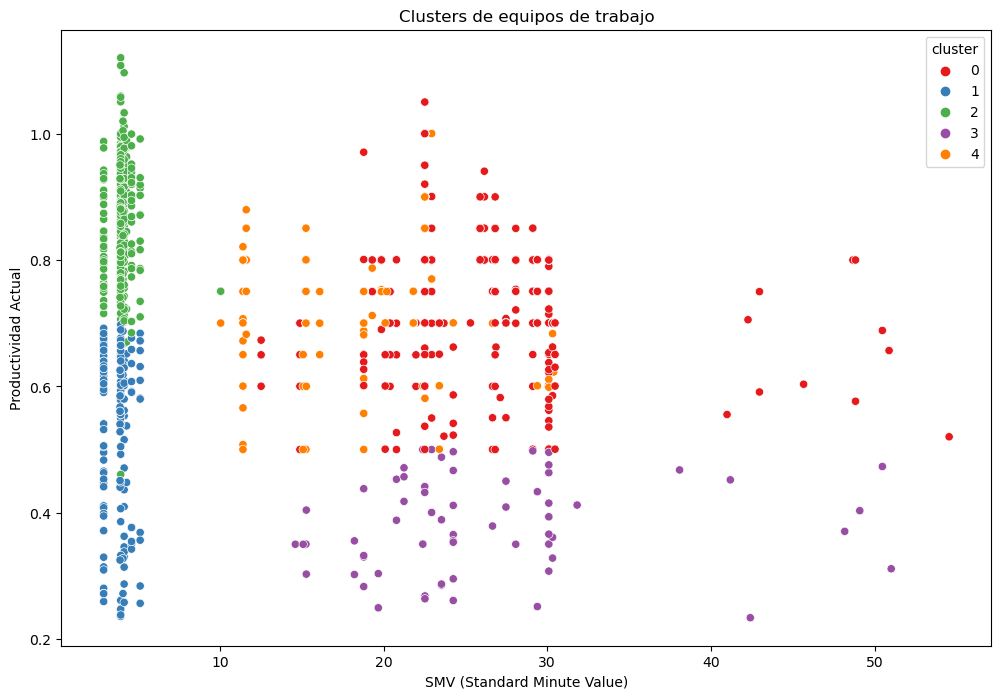

Perfil característico de cada clúster:


,smv,wip,over_time,actual_productivity,no_of_workers
cluster,,,,,
0,26.010596,1047.360104,7965.699482,0.760978,29.494819
1,3.696706,0.000000,1631.647059,0.525797,21.788235
2,4.072727,3.257576,2199.090909,0.870699,31.293939
3,26.397206,900.705882,6609.264706,0.379325,16.911765
4,17.804414,973.423423,3871.711712,0.753716,29.761261


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Cargamos los datos
data = pd.read_csv('D:\\Erika Monroy\\Desarrollo\\Machine Learning\\Fase 4\\Anexo 2 - productividad_confeccion.csv')

# Variables Relevantes
relevant_vars = ['smv', 'wip', 'over_time', 'actual_productivity', 'no_of_workers']
X = data[relevant_vars]  # Aseguramos usar el DataFrame correcto 'data'

# Escalar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualizar el dendrograma para encontrar el número óptimo de clusters
plt.figure(figsize=(12, 8))
dendrogram(linkage(X_scaled, method='ward', metric='euclidean'))
plt.title('Dendrograma')
plt.xlabel('Índices de muestra')
plt.ylabel('Distancia')
plt.show()

# Entrenar el modelo de clustering jerárquico
n_clusters = 5  # Ajustar según los resultados del dendrograma
cluster_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', metric='euclidean')
cluster_model.fit(X_scaled)


# Añadir las etiquetas de cluster al DataFrame original
data['cluster'] = cluster_model.labels_

# Visualizar los clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='smv', y='actual_productivity', hue='cluster', palette='Set1', legend='full')
plt.title('Clusters de equipos de trabajo')
plt.xlabel('SMV (Standard Minute Value)')
plt.ylabel('Productividad Actual')
plt.show()

# Calcular el perfil característico de cada cluster
cluster_profiles = data.groupby('cluster')[relevant_vars].mean()
print("Perfil característico de cada clúster:")
cluster_profiles

Basándonos en las gráficas y el resumen estadístico de los clusters que hemos generado con el método de Agglomerative Clustering, podemos hacer el siguiente análisis textual que describe los perfiles de cada cluster y cómo se relacionan con las variables consideradas:

### Análisis del Dendrograma
El dendrograma muestra una clara separación entre grupos de muestras, sugiriendo que el número óptimo de clusters podría ser cuatro. Este número se basa en las distancias significativas entre los grupos principales de ramas en el dendrograma.

### Análisis de los Clusters en la Gráfica de Dispersión
La gráfica de dispersión muestra cómo los clusters están distribuidos en términos de `SMV (Standard Minute Value)` y `Productividad Actual`. Cada cluster parece tener características distintivas en términos de estas dos métricas. Es notable que algunos clusters se dispersan más en SMV mientras mantienen una productividad relativamente estable, mientras que otros muestran una amplia variabilidad en productividad a pesar de tener SMV similares.

### Perfil Característico de Cada Cluster
**Cluster 0**
- **SMV**: Bajo
- **WIP**: Muy Alto
- **Tiempo Extra**: Muy Alto
- **Productividad Actual**: Media-Alta
- **Número de Trabajadores**: Alto
- **Descripción**: Este cluster maneja un volumen muy alto de trabajo en proceso y tiempo extra, lo que sugiere tareas que requieren mucho tiempo. A pesar de esto, mantienen una productividad relativamente alta y cuentan con muchos trabajadores, lo que podría indicar eficiencia en la gestión del trabajo intensivo.

**Cluster 1**
- **SMV**: Muy Bajo
- **WIP**: Nulo
- **Tiempo Extra**: Bajo
- **Productividad Actual**: Baja
- **Número de Trabajadores**: Bajo
- **Descripción**: Con casi ninguna carga de trabajo en progreso y pocos trabajadores, este cluster tiene una productividad baja. Su baja carga de trabajo y el poco tiempo extra indican una operación menos intensiva, que podría estar subutilizada o enfrentando ineficiencias.

**Cluster 2**
- **SMV**: Bajo
- **WIP**: Bajo
- **Tiempo Extra**: Medio
- **Productividad Actual**: Alta
- **Número de Trabajadores**: Alto
- **Descripción**: Este cluster es eficiente, con una alta productividad y un uso moderado de tiempo extra a pesar de tener SMV y WIP bajos. La eficiencia podría estar impulsada por un número adecuado de trabajadores bien gestionados.

**Cluster 3**
- **SMV**: Alto
- **WIP**: Alto
- **Tiempo Extra**: Alto
- **Productividad Actual**: Media
- **Número de Trabajadores**: Medio-Bajo
- **Descripción**: Este cluster trabaja con cargas de trabajo y requisitos de tiempo elevados, pero su productividad no es proporcionalmente alta, lo que puede indicar problemas de eficiencia o la necesidad de más trabajadores para manejar la carga de trabajo.

**Cluster 4**
- **SMV**: Muy Alto
- **WIP**: Muy Alto
- **Tiempo Extra**: Bajo
- **Productividad Actual**: Media-Alta
- **Número de Trabajadores**: Alto
- **Descripción**: A pesar de tener los valores más altos de SMV y WIP, este cluster muestra una productividad decente y utiliza menos tiempo extra. Esto puede sugerir que están manejando tareas muy complejas eficientemente, posiblemente gracias a la experiencia o especialización del equipo.

# Acción 4: Conclusiones.

___

A lo largo de este análisis, se han llevado a cabo diversas acciones con el objetivo de entender mejor la dinámica de productividad y eficiencia en los equipos de trabajo de una planta de confección. A continuación, se presentan las conclusiones generales derivadas de cada acción:

### Acción 1: Análisis Descriptivo y Exploratorio
El análisis inicial permitió establecer una comprensión clara del comportamiento de las variables clave como `SMV`, `WIP`, `Over Time`, `No. of Workers` y `Actual Productivity`. Se identificaron patrones significativos que indican cómo factores como el tiempo extra y la carga de trabajo influyen directamente en la productividad de los equipos.

### Acción 2: Clustering con K-means
La aplicación de K-means ayudó a segmentar los equipos en distintos clusters basados en características operativas similares. Este análisis reveló que grupos con altas cargas de trabajo y horas extras no necesariamente resultan en alta productividad, lo que sugiere áreas potenciales para mejorar la eficiencia operativa y la gestión de recursos.

### Acción 3: Agglomerative Clustering
El uso de Clustering Jerárquico proporcionó una perspectiva más detallada de la agrupación natural de los datos. A través del dendrograma, se determinó un número óptimo de clusters, cada uno con características distintivas que ofrecen insights valiosos para la optimización de procesos y la asignación de recursos. Los clusters varían significativamente en términos de productividad y eficiencia, lo que destaca la necesidad de estrategias de gestión diferenciadas.

### Implicaciones para la Gestión de la Producción
Los resultados obtenidos sugieren que una gestión más personalizada y basada en datos puede conducir a mejoras sustanciales en la productividad y eficiencia. Se recomienda implementar estrategias de capacitación focalizada, ajuste de cargas de trabajo, y reasignación de recursos basados en los perfiles de cada cluster para maximizar el rendimiento.

En conclusión, este estudio ha proporcionado una base sólida para decisiones informadas que pueden llevar a mejoras operativas y estratégicas en la planta de confección. La integración continua de análisis de datos en la gestión diaria será clave para mantener y mejorar los estándares de productividad.

# Referencias

___

- Giuseppe Bonaccorso. (2018). Machine Learning Algorithms: Popular Algorithms for Data Science and Machine Learning, 2nd Edition: Vol. 2nd ed. Packt Publishing. (pp. 340-355).
- Raschka, S., & Mirjalili, V. (2017). Python Machine Learning - Second Edition: Vol. 2nd ed. Packt Publishing. (pp. 363-372).
- Kane, F. (2017). Hands-On Data Science and Python Machine Learning. Packt Publishing. (pp. 198-204). https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1566405&lang=es&site=eds-live&scope=site&ebv=EB&ppid=pp_198
- Raschka, S., & Mirjalili, V. (2017). Python Machine Learning - Second Edition: Vol. 2nd ed. Packt Publishing. (pp. 79-90). https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1606531&lang=es&site=eds-live&scope=site&ebv=EB&ppid=pp_79
- Kane, F. (2017). Hands-On Data Science and Python Machine Learning. Packt Publishing. (pp. 174-181). https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1566405&lang=es&site=eds-live&scope=site&ebv=EB&ppid=pp_174
- Raschka, S., & Mirjalili, V. (2017). Python Machine Learning - Second Edition: Vol. 2nd ed. Packt Publishing. (pp. 348-363). https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1606531&lang=es&site=eds-live&scope=site&ebv=EB&ppid=pp_348
- Giuseppe Bonaccorso. (2018). Machine Learning Algorithms: Popular Algorithms for Data Science and Machine Learning, 2nd Edition: Vol. 2nd ed. Packt Publishing. (pp. 340-355). https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1881497&lang=es&site=eds-live&scope=site&ebv=EB&ppid=pp_340
- Raschka, S., & Mirjalili, V. (2017). Python Machine Learning - Second Edition: Vol. 2nd ed. Packt Publishing. (pp. 363-372). 
https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1606531&lang=es&site=eds-live&scope=site&ebv=EB&ppid=pp_363